In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import requests
import os
import scipy.stats as st 
from datetime import datetime
from config import api_key

# Output File (CSV)
path = os.path.join("cities.csv")
output_data_file  = pd.read_csv(path)
output_data_file

cities = []

for city in output_data_file['City']:
    if city not in cities:
        cities.append(city)

In [4]:
# Set Up Lists to Hold Reponse Info
city_name = []
country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Processing Record Counter Starting at 1
processing_record = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop Through List of Cities & Perform a Request for Data on Each
for city in cities:

# Exception Handling
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        print(f"Processing Record {processing_record} | {city_record}")

        
        # Increase Processing Record Counter by 1 For Each Loop
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    continue

# Print Ending Log Statement
print(f"-------------------------------")
print(f"Data Retrieval Completed")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Ostrovnoy
Processing Record 2 | Mahébourg
Processing Record 3 | Qaanaaq
Processing Record 4 | Zhuhai
Processing Record 5 | Cape Town
Processing Record 6 | Atuona
Processing Record 7 | Flinders
Processing Record 8 | Opuwo
Processing Record 9 | Tiksi
Processing Record 10 | Pushkinskiye Gory
Processing Record 11 | Aykhal
Processing Record 12 | Castro
Processing Record 13 | Avarua
Processing Record 14 | Saskylakh
Processing Record 15 | Constitución
Processing Record 16 | Albany
Processing Record 17 | Vilyuysk
Processing Record 18 | Ushuaia
Processing Record 19 | Bambous Virieux
Processing Record 20 | Kodinsk
Processing Record 21 | Teknāf
Processing Record 22 | Busselton
Processing Record 23 | Ambon City
Processing Record 24 | Maragogi
Processing Record 25 | Fallon
Processing Record 26 | Kantang
Processing Record 27 | Colonelganj
Processing Record 28 | Punta Arenas
Processing Record 29 | Rikitea
Processing Record

In [5]:
# Create a DataFrame from Cities, Latitude, Longitude, Temperature, Humidity, Cloudiness & Wind Speed
weather_dict = {
    "City": city_name,
    "Country": country,
    "Date": date,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": max_temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               548
Country            548
Date               548
Latitude           548
Longitude          548
Max Temperature    548
Humidity           548
Cloudiness         548
Wind Speed         548
dtype: int64

In [6]:
# Save DataFrame to csv file
weather_data.to_csv("cities.csv")
weather_data.head()

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,1631774783,68.0531,39.5131,43.29,96,100,23.64
1,Mahébourg,MU,1631774594,-20.4081,57.7000,74.25,78,75,9.22
2,Qaanaaq,GL,1631774553,77.4840,-69.3632,15.78,75,100,8.43
3,Zhuhai,CN,1631774501,22.2769,113.5678,91.78,70,20,6.91
4,Cape Town,ZA,1631774529,-33.9258,18.4232,58.12,78,20,4.00


In [7]:
weather_data.describe()

,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
count,5.480000e+02,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,1.631775e+09,19.610051,22.561581,66.471661,70.746350,57.348540,7.542245
std,7.312299e+01,33.361396,91.836626,16.075998,22.155085,40.429559,5.558310
min,1.631775e+09,-54.800000,-175.200000,15.780000,5.000000,0.000000,0.000000
25%,1.631775e+09,-6.409800,-61.089400,54.350000,61.000000,11.000000,3.440000
50%,1.631775e+09,20.891650,25.676700,70.395000,76.000000,73.500000,6.120000
75%,1.631775e+09,47.892200,108.176850,78.450000,88.000000,100.000000,9.877500
max,1.631775e+09,78.218600,179.316700,100.380000,100.000000,100.000000,34.520000


In [8]:
#Remove cities where Humidity > 100%
humid_cities = weather_data["City"].loc[weather_data["Humidity"] > 100].count()
if humid_cities > 0:
    weather_data = city_df.loc[weather_data["Humidity"] <= 100]
weather_data

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,1631774783,68.0531,39.5131,43.29,96,100,23.64
1,Mahébourg,MU,1631774594,-20.4081,57.7000,74.25,78,75,9.22
2,Qaanaaq,GL,1631774553,77.4840,-69.3632,15.78,75,100,8.43
3,Zhuhai,CN,1631774501,22.2769,113.5678,91.78,70,20,6.91
4,Cape Town,ZA,1631774529,-33.9258,18.4232,58.12,78,20,4.00
...,...,...,...,...,...,...,...,...,...
543,Yabrūd,SY,1631774954,33.9674,36.6574,62.53,36,0,2.35
544,Paraíso,CR,1631774954,9.8383,-83.8656,63.46,98,100,1.54
545,Verāval,IN,1631774954,20.9000,70.3667,82.31,86,100,19.77
546,Novyy Urgal,RU,1631774955,51.0736,132.5642,54.45,90,100,7.99


#### Latitude vs. Temperature Plot

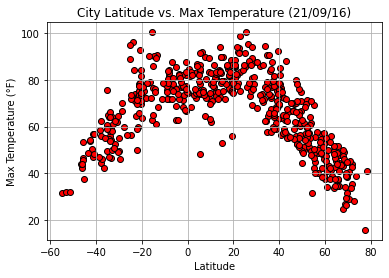

In [9]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Max Temperature"], facecolors="red", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Max Temperature ({plot_date})")
x_lat = weather_data['Latitude']
y_temp = weather_data['Max Temperature']
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Images/City_Latitude_vs_Max_Temperature.png")

# Show Plot
plt.show()


Analysis: It is clear that the weather becomes significantly warmer as the Latitude approaches zero (the city which is near the equator).

#### Latitude vs. Humidity Plot

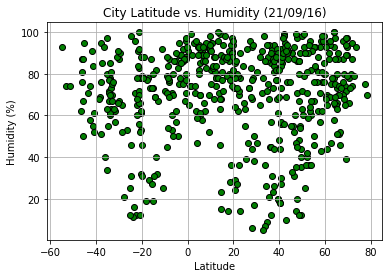

In [10]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Humidity"], facecolors="green", marker="o", edgecolor="black")
# Incorporate Other Graph Properties
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Humidity ({plot_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Images/City_Latitude_vs_Humidity.png")

# Show Plot
plt.show()

Analysis: There is a little to no correlation between humidity and Latitude cause the separated data in the above scatter plot. Latitude vs. Cloudiness Plot

#### Latitude vs. Cloudiness Plot

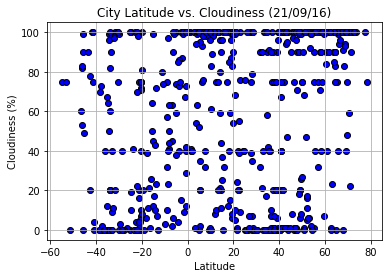

In [11]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
from datetime import datetime
dt = int(date[0])
plot_date = datetime.fromtimestamp(dt).strftime('%y/%m/%d')
plt.title(f"City Latitude vs. Cloudiness ({plot_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Images/City_Latitude_vs_Cloudiness.png")

# Show Plot
plt.show()

Analysis: There is a weak relationship between latitude and cloudiness and also a strong band of cities sits at 0, 80, and 100% cloudiness

#### Latitude vs. Wind Speed Plot

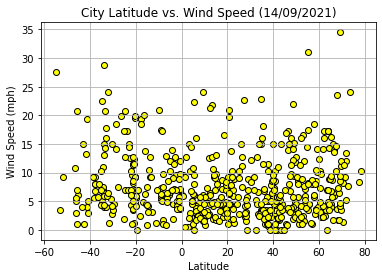

In [12]:
# Build Scatter Plot for Each Data Type
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], facecolors="yellow", marker="o", edgecolor="black")

# Incorporate Other Graph Properties
plt.title("City Latitude vs. Wind Speed (14/09/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure
plt.savefig("Images/City_Latitude_vs_Wind_Speed.png")

# Show Plot
plt.show()

Analysis: Also there is no strong relationship between latitude and wind speed as well and they are far from each other without any reasonable relation. 

In [13]:
# northern hemisphere data frame
north_df = weather_data[weather_data["Latitude"] >= 0]
north_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,1631774783,68.0531,39.5131,43.29,96,100,23.64
2,Qaanaaq,GL,1631774553,77.4840,-69.3632,15.78,75,100,8.43
3,Zhuhai,CN,1631774501,22.2769,113.5678,91.78,70,20,6.91
8,Tiksi,RU,1631774785,71.6872,128.8694,43.93,74,100,5.14
9,Pushkinskiye Gory,RU,1631774785,57.0209,28.9103,48.51,62,32,1.05
...,...,...,...,...,...,...,...,...,...
543,Yabrūd,SY,1631774954,33.9674,36.6574,62.53,36,0,2.35
544,Paraíso,CR,1631774954,9.8383,-83.8656,63.46,98,100,1.54
545,Verāval,IN,1631774954,20.9000,70.3667,82.31,86,100,19.77
546,Novyy Urgal,RU,1631774955,51.0736,132.5642,54.45,90,100,7.99


In [14]:
# southern hemisphere data frame
south_df = weather_data[weather_data["Latitude"] < 0]
south_df

,City,Country,Date,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed
1,Mahébourg,MU,1631774594,-20.4081,57.7000,74.25,78,75,9.22
4,Cape Town,ZA,1631774529,-33.9258,18.4232,58.12,78,20,4.00
5,Atuona,PF,1631774784,-9.8000,-139.0333,78.13,72,3,20.98
6,Flinders,AU,1631774784,-34.5833,150.8552,64.20,67,50,5.01
7,Opuwo,NA,1631774785,-18.0607,13.8400,72.09,19,6,2.44
...,...,...,...,...,...,...,...,...,...
523,Kununurra,AU,1631774948,-15.7667,128.7333,100.38,27,50,13.80
526,Viedma,AR,1631774790,-40.8135,-62.9967,48.43,52,0,3.02
536,Padang,ID,1631774952,-0.9492,100.3543,87.85,77,42,5.08
539,Palu,ID,1631774953,-0.8917,119.8707,76.17,97,100,3.89


# Northern Hemisphere - Max Temperature vs Latitude

In [15]:
north_x_lat = north_df["Latitude"]
north_y_temp = north_df["Max Temperature"]

nt_corr_coef = round(st.pearsonr(north_x_lat, north_y_temp)[0],2)
print(f"correlation coefficient: {nt_corr_coef}")

n_temp = st.linregress(north_x_lat, north_y_temp)
print(f"The r-value is {round(n_temp.rvalue,2)}")

correlation coefficient: -0.8
The r-value is -0.8


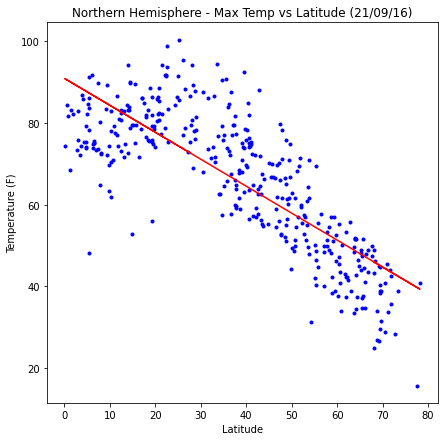

In [16]:
#create equation of line
line = n_temp.slope * north_x_lat + n_temp.intercept
line_eq = f"y = {round(n_temp.slope,2)}x + {round(n_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, ax = plt.subplots(figsize=(7,7))
ax.set_autoscale_on(True)
ax.scatter(north_x_lat, north_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (0,0), fontsize=12, color="red")

file = os.path.join("Images/North_lat_temp.png")
plt.savefig(file)

Analysis: It is clear that the correlation coeffient and linear regression model shows a strong negative correlation between latitude and max temperature in northern hemisphere. 

# Southern Hemisphere - Max Temperature vs Latitude

In [17]:
south_x_lat = south_df["Latitude"]
south_y_temp = south_df["Max Temperature"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_temp)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_temp = st.linregress(south_x_lat, south_y_temp)
print(f"The r-value is {s_temp.rvalue}")

correlation coefficient: 0.76
The r-value is 0.7551170155982215


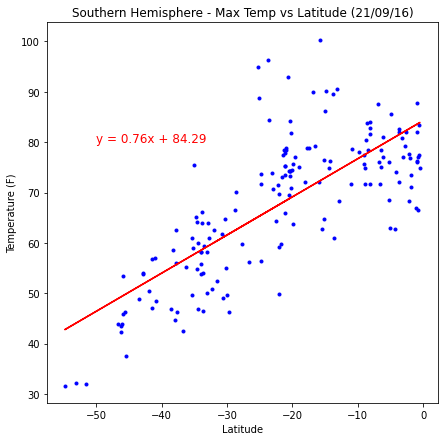

In [18]:
#create equation of line
line = s_temp.slope * south_x_lat + s_temp.intercept
line_eq = f"y = {round(s_temp.slope,2)}x + {round(s_temp.intercept,2)}"

# plot linear model on top of scatter plot
fig, axs = plt.subplots(figsize=(7,7))
axs.set_autoscale_on(True)
axs.scatter(south_x_lat, south_y_temp, marker='.', facecolors="blue", edgecolors="blue")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Max Temp vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.annotate(line_eq, (-50,80), fontsize=12, color="red")

file = os.path.join("Images/South_lat_temp.png")
plt.savefig(file)

Analysis: The correlation coefficient and linear regression model reflects a highly positive correlation between latitude and maximum temperature in southern hemisphere.

# Northern Hemisphere - Humidity (%) vs Latitude

In [19]:
north_y_hum = north_df["Humidity"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_hum)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

n_humid = st.linregress(north_x_lat, north_y_hum)
print(f"The r-value is {n_humid.rvalue}")

correlation coefficient: -0.04
The r-value is -0.041326837184794234


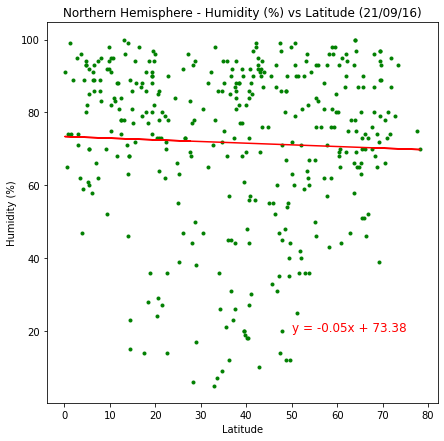

In [20]:
#create equation of line
line = n_humid.slope * north_x_lat + n_humid.intercept
line_eq = f"y = {round(n_humid.slope,2)}x + {round(n_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, nh = plt.subplots(figsize=(7,7))
nh.set_autoscale_on(True)
nh.scatter(north_x_lat, north_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (50,20), fontsize=12, color="red")

file = os.path.join("Images/North_lat_humid.png")
plt.savefig(file)

Analysis: The correlation coefficent and linear regression model for humidity vs latitude shows a weak positive correlation for north hemisphere.

# Southern Hemisphere - Humidity (%) vs Latitude

In [21]:
south_y_hum = south_df["Humidity"]

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_hum)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

s_humid = st.linregress(south_x_lat, south_y_hum)
print(f"The r-value is {s_humid.rvalue}")

correlation coefficient: 0.07
The r-value is 0.07298761206511183


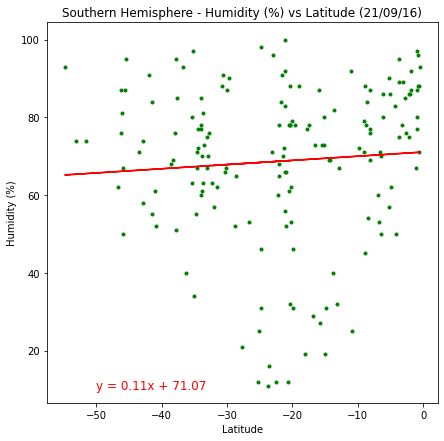

In [22]:
#create equation of line
line = s_humid.slope * south_x_lat + s_humid.intercept
line_eq = f"y = {round(s_humid.slope,2)}x + {round(s_humid.intercept,2)}"

# plot linear model on top of scatter plot
fig, sh = plt.subplots(figsize=(7,7))
sh.set_autoscale_on(True)
sh.scatter(south_x_lat, south_y_hum, marker='.', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Humidity (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-50,10), fontsize=12, color="red")

file = os.path.join("Images/South_lat_humid.png")
plt.savefig(file)

Analysis: The correlation coefficent and linear regression model for humidity vs latitude shows a weak positive correlation for south hemisphere as well as north hemisphere with the amount of slope near zero.

# Northern Hemisphere - Cloudiness (%) vs Latitude

In [23]:
north_y_cloud = north_df["Cloudiness"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_cloud)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

n_cloud = st.linregress(north_x_lat, north_y_cloud)
print(f"The r-value is {n_cloud.rvalue}")

correlation coefficient: 0.12
The r-value is 0.12321066680910514


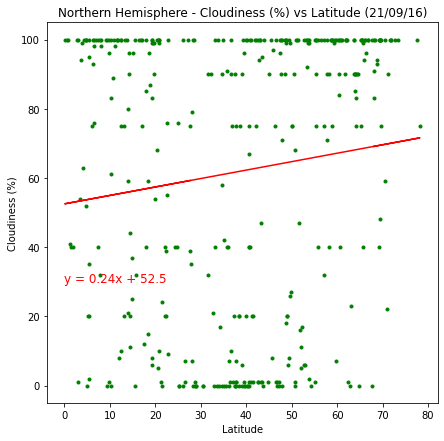

In [24]:
#create equation of line 
line = n_cloud.slope * north_x_lat + n_cloud.intercept
line_eq = f"y = {round(n_cloud.slope,2)}x + {round(n_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, nw = plt.subplots(figsize=(7,7))
nw.set_autoscale_on(True)
nw.scatter(north_x_lat, north_y_cloud, marker='.', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (0, 30), fontsize=12, color="red")

file = os.path.join("Images/North_lat_cloud.png")
plt.savefig(file)

Analysis:The correlation coefficient and linear regression model show a weak positive correlation between cloudiness and latitude in the northern hemisphere.

# Southern Hemisphere - Cloudiness (%) vs Latitude

In [25]:
south_y_cloud = south_df["Cloudiness"] 

s_corr_coef = round(st.pearsonr(south_x_lat, south_y_cloud)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_cloud = st.linregress(south_x_lat, south_y_cloud)
print(f"The r-value is {south_cloud.rvalue}")

correlation coefficient: 0.1
The r-value is 0.09810076826882691


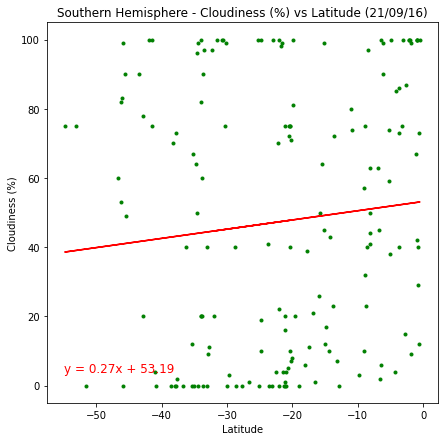

In [26]:
#create equation of line 
line = south_cloud.slope * south_x_lat + south_cloud.intercept
line_eq = f"y = {round(south_cloud.slope,2)}x + {round(south_cloud.intercept,2)}"

# plot linear model on top of scatter plot
fig, sw = plt.subplots(figsize=(7,7))
sw.set_autoscale_on(True)
sw.scatter(south_x_lat, south_y_cloud, marker='.', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Cloudiness (%) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-55, 4), fontsize=12, color="red")

file = os.path.join("Images/South_lat_cloud.png")
plt.savefig(file)


Analysis: The correlation coefficient and linear regression model show a weak positive correlation between cloudiness and latitude in the southern hemisphere as well.

# Northern Hemisphere - Wind Speed (mph) vs Latitude

In [27]:
north_y_wind = north_df["Wind Speed"]

n_corr_coef = round(st.pearsonr(north_x_lat, north_y_wind)[0],2)
print(f"correlation coefficient: {n_corr_coef}")

north_wind = st.linregress(north_x_lat, north_y_wind)
print(f"The r-value is {north_wind.rvalue}")

correlation coefficient: 0.13
The r-value is 0.13454027689096373


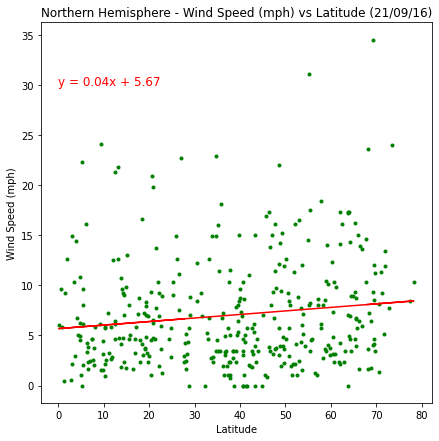

In [28]:
#create equation of line
line = north_wind.slope * north_x_lat + north_wind.intercept
line_eq = f"y = {round(north_wind.slope,2)}x + {round(north_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, nw = plt.subplots(figsize=(7,7))
nw.set_autoscale_on(True)
nw.scatter(north_x_lat, north_y_wind, marker='.', facecolors="green", edgecolors="green")
plt.plot(north_x_lat, line, 'r-')
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (0, 30), fontsize=12, color="red")

file = os.path.join("Images/North_lat_wind.png")
plt.savefig(file)

Analysis: The correlation coefficient and linear regression model depict a weak positive correlation between wind speed(mph) and latitude in the northern hemisphere.

# Southern Hemisphere - Wind Speed (mph) vs Latitude

In [29]:
south_y_wind = south_df["Wind Speed"]
s_corr_coef = round(st.pearsonr(south_x_lat, south_y_wind)[0],2)
print(f"correlation coefficient: {s_corr_coef}")

south_wind = st.linregress(south_x_lat, south_y_wind)
print(f"The r-value is {south_wind.rvalue}")

correlation coefficient: -0.14
The r-value is -0.1354008457268365


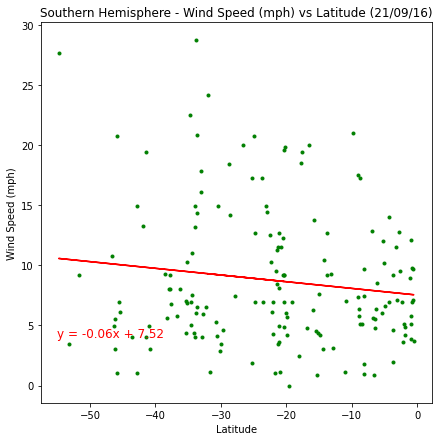

In [30]:
#create equation of line
line = south_wind.slope * south_x_lat + south_wind.intercept
line_eq = f"y = {round(south_wind.slope,2)}x + {round(south_wind.intercept,2)}"

# plot linear model on top of scatter plot
fig, sw = plt.subplots(figsize=(7,7))
sw.set_autoscale_on(True)
sw.scatter(south_x_lat, south_y_wind, marker='.', facecolors="green", edgecolors="green")
plt.plot(south_x_lat, line, 'r-')
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs Latitude ({plot_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq, (-55, 4), fontsize=12, color="red")

file = os.path.join("Images/South_lat_wind.png")
plt.savefig(file)


Analysis: The correlation coefficient and linear regression model shows a negative correlation between wind speed(mph) and latitude in the southern hemisphere.

# Temperature (F) vs Latitude

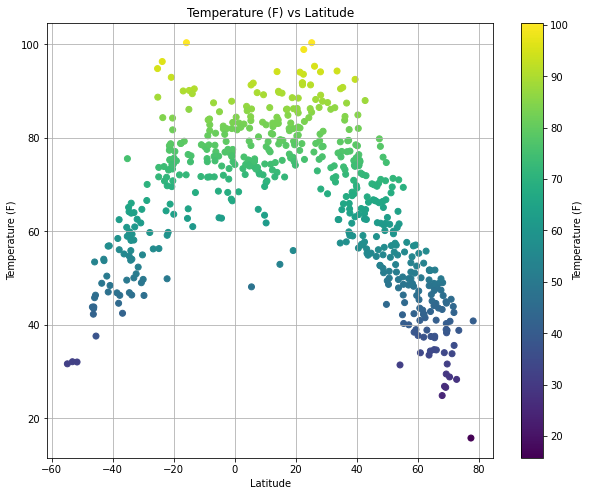

In [31]:
colors = y_temp

fig, ax = plt.subplots(figsize=(10,8))
ax.set_autoscale_on(True)
plt.scatter(x_lat,y_temp, c=colors)
colorbar = plt.colorbar()
colorbar.ax.set_ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("Temperature (F) vs Latitude")
plt.grid()

file = os.path.join("Images/heatmap.png")
plt.savefig(file)